In [1]:
#ONLY FOR COLLAB RUNTIME
%load_ext tensorboard
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
#ONLY FOR COLLAB RUNTIME
!pip install stable-baselines[mpi]==2.10.1 --quiet
!pip install pyvirtualdisplay
!pip install procgen --quiet
!pip install gym --quiet

     |████████████████████████████████| 245kB 28.4MB/s 
     |████████████████████████████████| 39.9MB 73kB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
     |████████████████████████████████| 22.2MB 1.3MB/s 
     |████████████████████████████████| 204kB 58.3MB/s 
     |████████████████████████████████| 675kB 54.9MB/s 
     |████████████████████████████████| 40kB 6.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/CSW182 Final')
#sys.path.append('/content/gdrive/Sharedwithme/CSW182 Final')

In [5]:
import imageio
import time
import numpy as np
import base64
import IPython
import PIL.Image
import pyvirtualdisplay
import pickle
import gym

# Video 
from pathlib import Path
from IPython import display as ipythondisplay

# Stable baselines

from helpers import record
from ImpalaCnn import ImpalaCnn

from stable_baselines import PPO2
from stable_baselines.common.policies import CnnPolicy
from stable_baselines.common.evaluation import evaluate_policy

ModuleNotFoundError: ignored

In [ ]:
from gym3 import ToGymEnv, ViewerWrapper, ExtractDictObWrapper
from procgen import ProcgenGym3Env

#logs_base_dir = './runs' # Log DIR
env_id = 'procgen:procgen-fruitbot-v0'
env = gym.make(env_id, distribution_mode='easy', num_levels=20000)

In [ ]:
impala_model = PPO2(ImpalaCnn, env, verbose=0, n_steps = 256, nminibatches=8) 
base_model = PPO2(CnnPolicy, env, verbose=0, n_steps = 256, nminibatches=8)





Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





In [ ]:
import matplotlib.pyplot as plt

def run_training(model, steps_per_round=100000,limit=5):
# This function will run a training with value set in `steps_per_round`
# after each round it will measure it's value, If value is under `limit` it will keep training until score limit is reached.  
  steps_total = 0
  score = 0
  best_score = -10000
  best_model = None
  score_array = []
  timestep_array = []

  while score < limit:
      steps_total = steps_total + steps_per_round
      model.learn(total_timesteps=steps_per_round)

      new_evaluation = evaluate_policy(model, env, n_eval_episodes=100, deterministic=True, render=False, callback=None, reward_threshold=None, return_episode_rewards=False)
      score = new_evaluation[0]
      timestep_array.append(steps_total)
      score_array.append(score)
      #pickle.dump(score_array, open('/content/gdrive/MyDrive/CSW182 Final/50FruitBot/50score_array.pickle', 'wb'))
      #pickle.dump(timestep_array, open( '/content/gdrive/MyDrive/CSW182 Final/50FruitBot/50timestep_array.pickle', 'wb'))
      #model.save('/content/gdrive/MyDrive/CSW182 Final/50FruitBot/50ppo2_impala.checkpoint')

      if score > best_score:
        best_score = score
        best_model = model
        #record(model, length=1000) # uncomment to show video from each round
      print('steps_total: ' + str(steps_total))
      print("Mean reward:", score )
    

  # Threshold reached > evaluate over 100 episodes > Video rec/display
  print("Reward limit achived, measuring over 100ep & recording video, please wait...")
  #record(model, length=1000)
  ep100 = evaluate_policy(model, env, n_eval_episodes=100, deterministic=True, render=False, callback=None, reward_threshold=None, return_episode_rewards=False)
  print("Mean Reward 100 Episodes: ", ep100[0])
  #model.save('/content/gdrive/MyDrive/CSW182 Final/50FruitBot/50ppo2_impala.' + str(steps_total) + "-" + env_id)
  plt.plot(timestep_array, score_array)
  plt.xlabel('Total Timesteps')
  plt.ylabel('Mean reward over 100 different levels')

In [ ]:
run_training(base_model)

steps_total: 100000
Mean reward: -1.62
steps_total: 200000
Mean reward: -2.07
steps_total: 300000
Mean reward: -1.29
steps_total: 400000
Mean reward: -1.69
steps_total: 500000
Mean reward: -2.79
steps_total: 600000
Mean reward: -3.05
steps_total: 700000
Mean reward: -1.78
steps_total: 800000
Mean reward: -1.53
steps_total: 900000
Mean reward: -1.15
steps_total: 1000000
Mean reward: -0.78
steps_total: 1100000
Mean reward: -1.49
steps_total: 1200000
Mean reward: -1.36
steps_total: 1300000
Mean reward: -1.8
steps_total: 1400000
Mean reward: -1.42
steps_total: 1500000
Mean reward: -2.12
steps_total: 1600000
Mean reward: -1.79
steps_total: 1700000
Mean reward: -1.55
steps_total: 1800000
Mean reward: -1.97
steps_total: 1900000
Mean reward: -1.03
steps_total: 2000000
Mean reward: -1.88
steps_total: 2100000
Mean reward: -1.4
steps_total: 2200000
Mean reward: -1.92
steps_total: 2300000
Mean reward: -1.97
steps_total: 2400000
Mean reward: -1.64
steps_total: 2500000
Mean reward: -1.13
steps_total

KeyboardInterrupt: ignored

steps_total: 100000
Mean reward: -1.09
steps_total: 200000
Mean reward: -1.03
steps_total: 300000
Mean reward: -1.2
steps_total: 400000
Mean reward: -0.61
steps_total: 500000
Mean reward: 0.09
steps_total: 600000
Mean reward: 0.78
steps_total: 700000
Mean reward: 1.71
steps_total: 800000
Mean reward: 1.14
steps_total: 900000
Mean reward: 1.46
steps_total: 1000000
Mean reward: 2.73
steps_total: 1100000
Mean reward: 2.07
steps_total: 1200000
Mean reward: 1.77
steps_total: 1300000
Mean reward: 3.28
steps_total: 1400000
Mean reward: 1.04
steps_total: 1500000
Mean reward: 2.36
steps_total: 1600000
Mean reward: 1.57
steps_total: 1700000
Mean reward: 1.48
steps_total: 1800000
Mean reward: 4.19
steps_total: 1900000
Mean reward: 3.52
steps_total: 2000000
Mean reward: 2.71
steps_total: 2100000
Mean reward: 5.69
Reward limit achived, measuring over 100ep & recording video, please wait...
Mean Reward 100 Episodes:  3.41


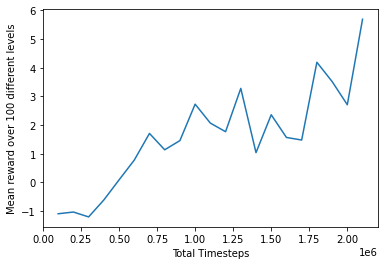

In [ ]:
run_training(impala_model)

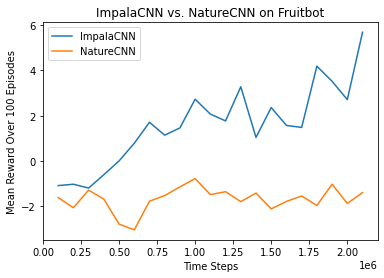

In [ ]:
base_scores = [-1.62, -2.07, -1.29, -1.69, -2.79, -3.05, -1.78, -1.53, -1.15, -0.78, -1.49, -1.36, -1.8, -1.42, -2.12, -1.79, -1.55, -1.97, -1.03, -1.88, -1.4]
impala_scores = [-1.09, -1.03, -1.2, -0.61, 0, 0.78, 1.71, 1.14, 1.46, 2.73, 2.07, 1.77, 3.28, 1.04, 2.36, 1.57, 1.48, 4.19, 3.52, 2.71, 5.69]

time = []
for i in range(1, 22):
  time.append(i * 100000)
plt.plot(time, impala_scores)
plt.plot(time, base_scores)
plt.title('ImpalaCNN vs. NatureCNN on Fruitbot')
plt.xlabel('Time Steps')
plt.ylabel('Mean Reward Over 100 Episodes')
plt.legend(['ImpalaCNN','NatureCNN'])